# Questionário 2 


In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import iqr
from scipy.stats import pearsonr, spearmanr
import requests
from io import StringIO

Questão 1

In [90]:
url = "https://gist.githubusercontent.com/aishwarya8615/89d9f36fc014dea62487f7347864d16a/raw/8629d284e13976dcb13bb0b27043224b9266fffa/Life_Expectancy_Data.csv"

response = requests.get(url)
data = response.text

df = pd.read_csv(StringIO(data))

df.head(10)


,Country,Continent,Year,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,...,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income_composition_of_resources,Schooling
0,Afghanistan,Asia,2015,Developing,65.0,263,62,0.01,71.279624,65.0,...,6.0,8.16,65,0.1,584.259210,33736494,17.2,17.3,0.479,10.1
1,Afghanistan,Asia,2014,Developing,59.9,271,64,0.01,73.523582,62.0,...,58.0,8.18,62,0.1,612.696514,327582,17.5,17.5,0.476,10.0
2,Afghanistan,Asia,2013,Developing,59.9,268,66,0.01,73.219243,64.0,...,62.0,8.13,64,0.1,631.744976,31731688,17.7,17.7,0.470,9.9
3,Afghanistan,Asia,2012,Developing,59.5,272,69,0.01,78.184215,67.0,...,67.0,8.52,67,0.1,669.959000,3696958,17.9,18.0,0.463,9.8
4,Afghanistan,Asia,2011,Developing,59.2,275,71,0.01,7.097109,68.0,...,68.0,7.87,68,0.1,63.537231,2978599,18.2,18.2,0.454,9.5
5,Afghanistan,Asia,2010,Developing,58.8,279,74,0.01,79.679367,66.0,...,66.0,9.20,66,0.1,553.328940,2883167,18.4,18.4,0.448,9.2
6,Afghanistan,Asia,2009,Developing,58.6,281,77,0.01,56.762217,63.0,...,63.0,9.42,63,0.1,445.893298,284331,18.6,18.7,0.434,8.9
7,Afghanistan,Asia,2008,Developing,58.1,287,80,0.03,25.873925,64.0,...,64.0,8.33,64,0.1,373.361116,2729431,18.8,18.9,0.433,8.7
8,Afghanistan,Asia,2007,Developing,57.5,295,82,0.02,10.910156,63.0,...,63.0,6.73,63,0.1,369.835796,26616792,19.0,19.1,0.415,8.4
9,Afghanistan,Asia,2006,Developing,57.3,295,84,0.03,17.171518,64.0,...,58.0,7.43,58,0.1,272.563770,2589345,19.2,19.3,0.405,8.1


Developing    0.81796
Developed     0.18204
Name: Status, dtype: float64


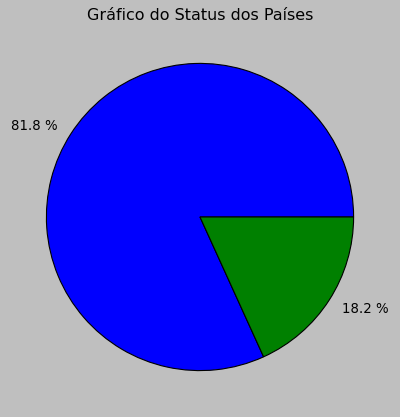

In [91]:
qntd_status = df["Status"].value_counts(normalize=True)

print(qntd_status)

qntd2 = np.array(qntd_status).round(3)
legend = []

for i in qntd2:
    legend.append(f"{i*100} %")

plt.style.use("classic")
plt.title("Gráfico do Status dos Países")
plt.pie(qntd_status, labels=legend)
plt.show()


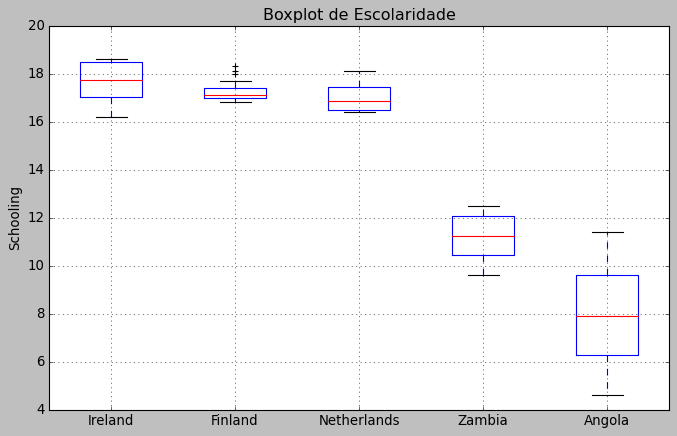

In [92]:
paises = ["Ireland", "Finland", "Netherlands", "Zambia", "Angola"]

df2 = df[df["Country"].isin(paises)]

plt.figure(figsize=(10,6))
plt.boxplot([df2[df2['Country'] == pais]["Schooling"] for pais in paises], labels=paises)
plt.title("Boxplot de Escolaridade")
plt.ylabel("Schooling")
plt.grid(True)
plt.show()


<Figure size 960x480 with 0 Axes>

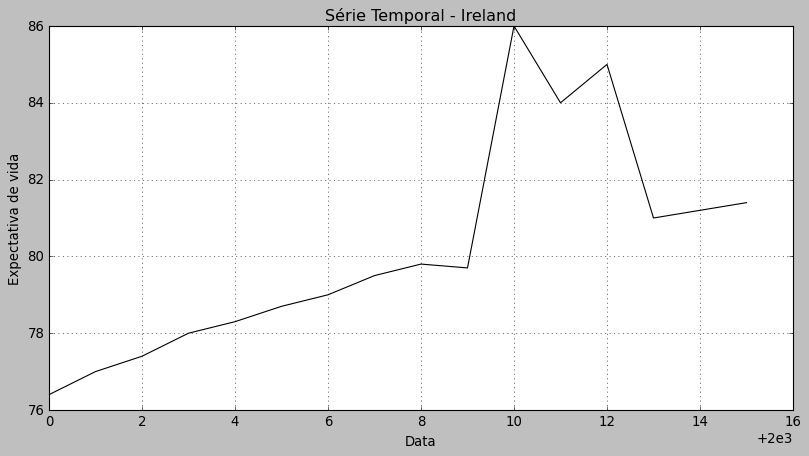

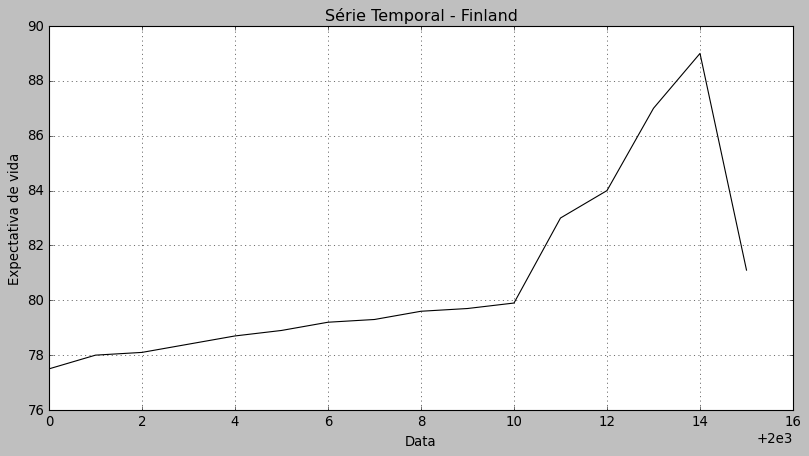

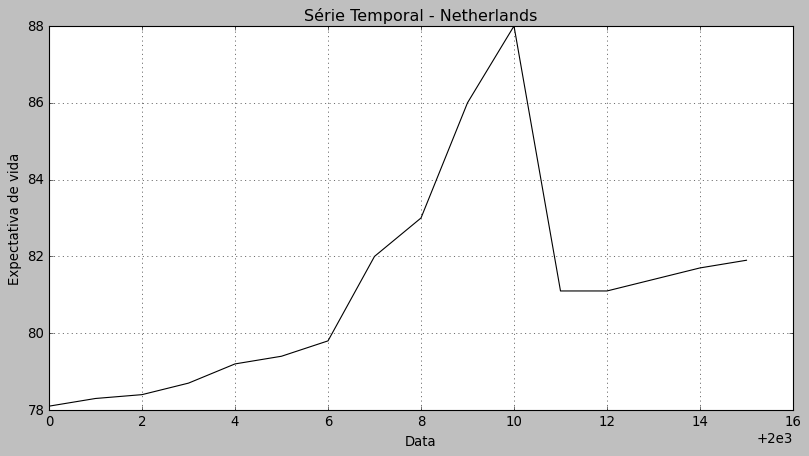

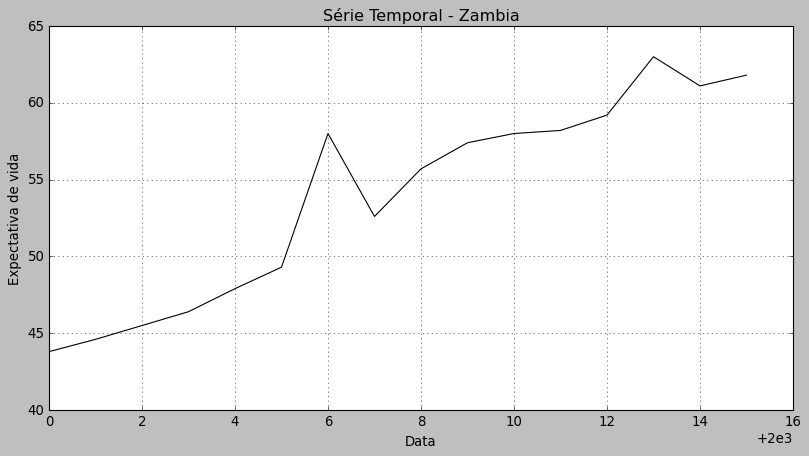

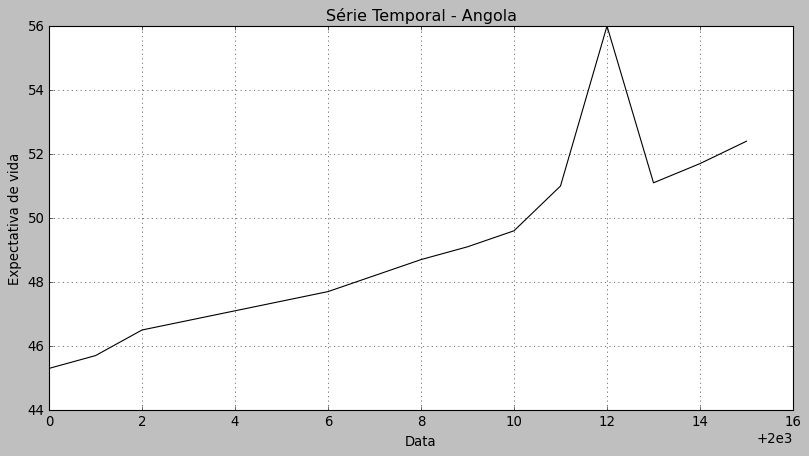

In [97]:
paises = ["Ireland", "Finland", "Netherlands", "Zambia", "Angola"]

plt.figure(figsize=(12, 6))

for pais in paises:
    serie = df[df["Country"] == pais]
    serie = serie[["Year", "Life_expectancy "]]
    serie.set_index("Year", inplace=True)
    plt.figure(figsize=(12, 6))
    plt.plot(serie.index, serie["Life_expectancy "], color='black')
    plt.title(f'Série Temporal - {pais}')
    plt.xlabel('Data')
    plt.ylabel('Expectativa de vida')
    plt.grid(True)
    plt.show()




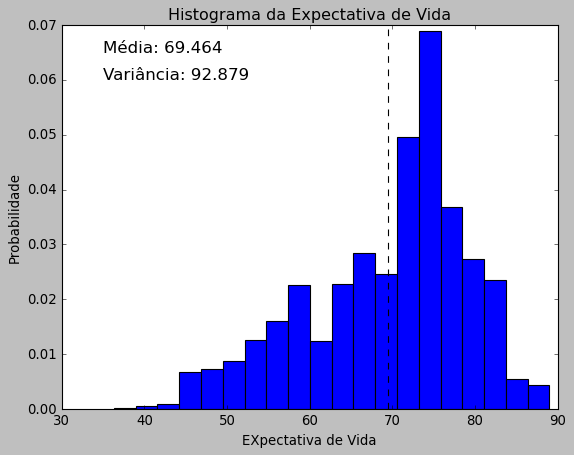

In [113]:
life_hist = df["Life_expectancy "]

media = int(np.mean(life_hist)*1000)/1000
var =  int(np.var(life_hist)*1000)/1000


plt.hist(life_hist, density=True, bins = 20 )
plt.axvline(media, color="black", linestyle="--")
plt.title("Histograma da Expectativa de Vida")
plt.xlabel("EXpectativa de Vida")
plt.ylabel("Probabilidade")
plt.text(35, 0.065, f"Média: {media}", fontsize=15)
plt.text(35, 0.06, f"Variância: {var}", fontsize=15)
plt.show()